# Hose Sales Prediction (Keras-Regression vs Multiple Regression)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Data used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
Data = pd.read_csv('kc_house_data.csv')


# Exploratory Data Analysis

In [11]:
Data.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [12]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
# let's drop unnecessory featurs
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [6]:
# check if there are any Null values
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

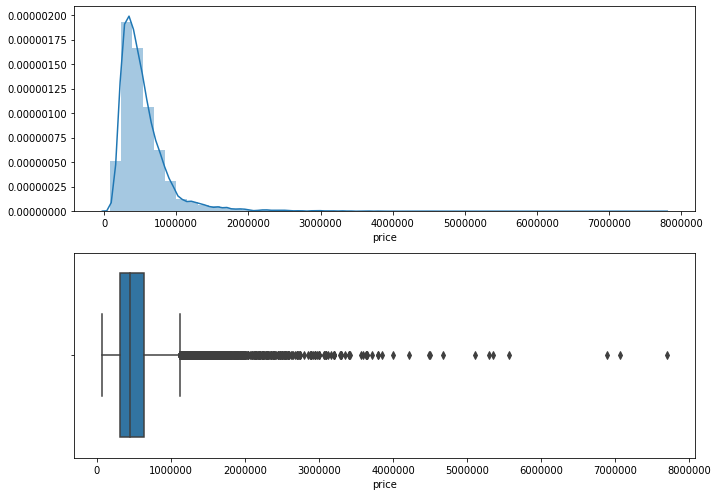

In [67]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()





C:\Users\mahsa.mirgholami\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if sys.path[0] == '':


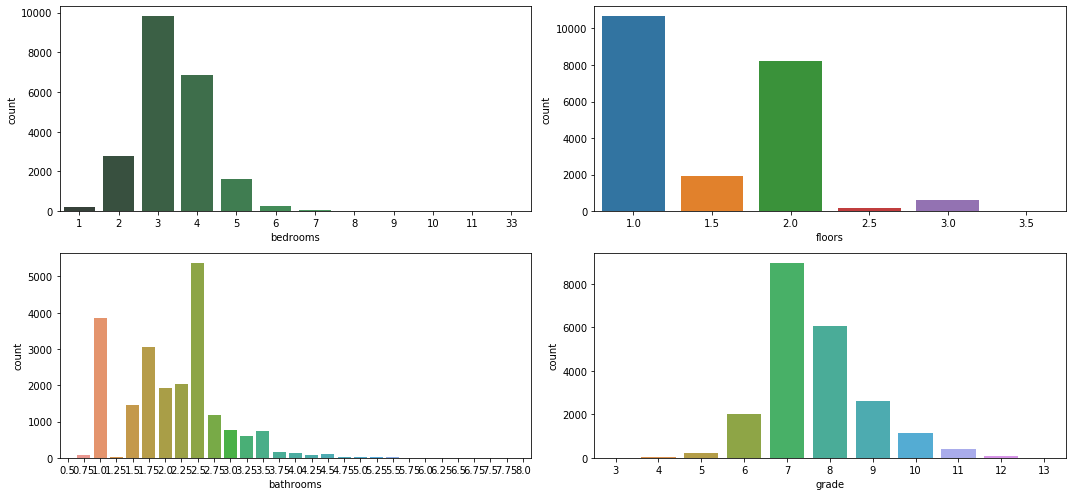

In [61]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()


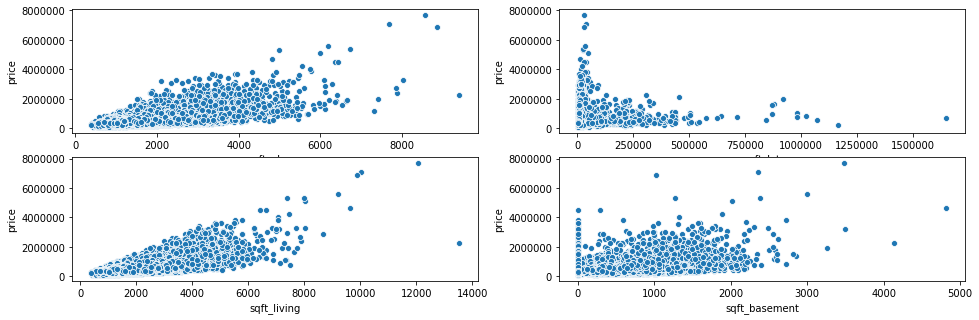

In [26]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

In [3]:
# check correlation
Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

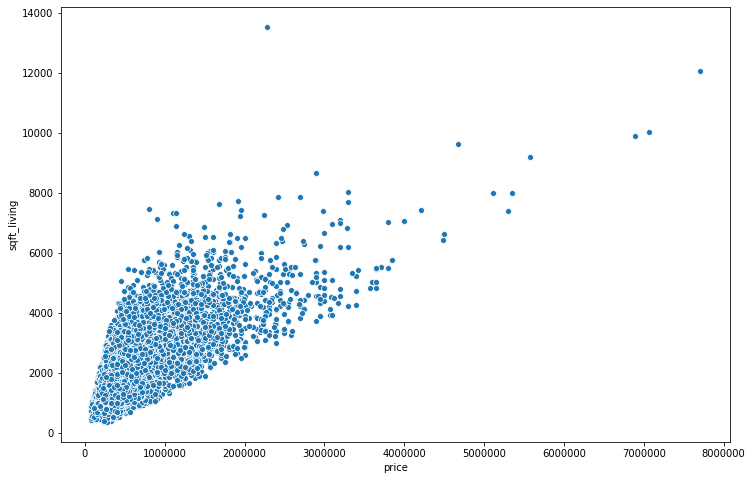

In [4]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

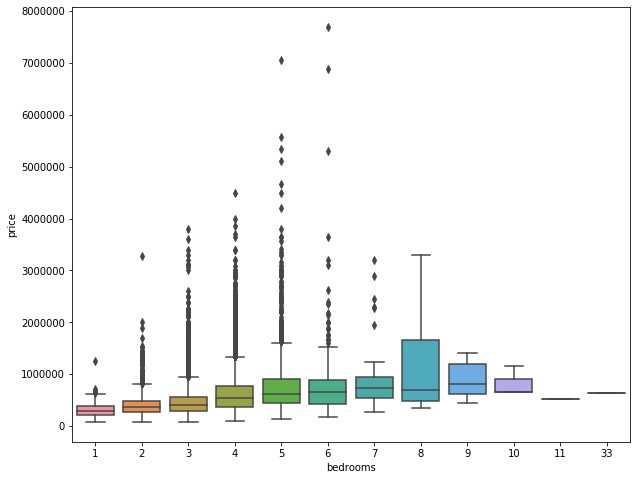

In [13]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

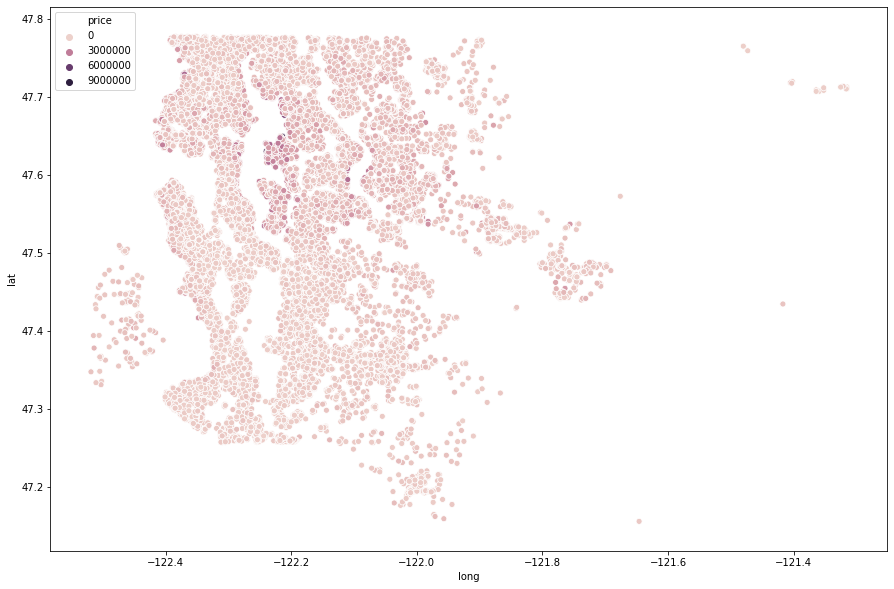

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=Data,hue='price')

In [20]:
#let's clean it the map a bit - we are taking 99% bottom price houses
non_top_1_perc = Data.sort_values('price',ascending = False).iloc[216:]


In [19]:
len(Data)*0.01

215.97

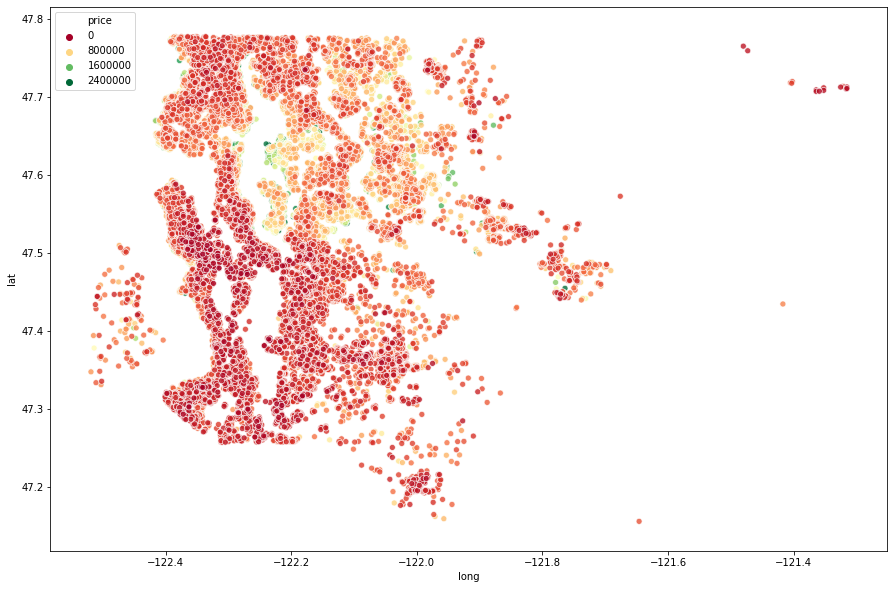

In [29]:
# let's try this one again
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,alpha = 0.8,palette = 'RdYlGn', hue='price')


In [6]:
#visualizing data
#sns.pairplot(Data['bedrooms bathrooms sqft_living floors waterfront price'.split()])

In [5]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


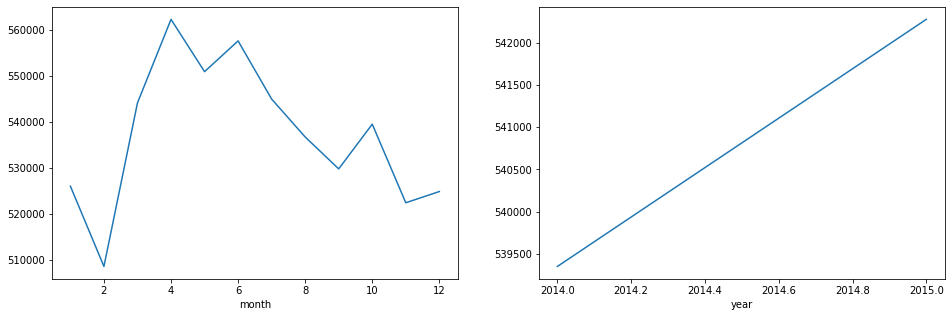

In [10]:
# data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

# Scaling and Train Test Split


In [13]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Feature Scalling 

In [14]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Multiple Linear Regression

In [68]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([ -4419.89842505, -35211.3774935 ,  32717.42144864,  82335.34113654,
         6652.00801994,   4508.5820716 ,  56773.15162922,  38821.10068575,
        16171.11700156, 115064.98945859,  76803.28185232,  26825.95338734,
       -78762.49053487,   7213.18051193, -33120.46040862,  83766.48867139,
       -33744.28975982,  15649.56748185, -11311.03638327,   3259.02064101,
        16731.99926567])

In [24]:
#coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
#coeff_df

In [70]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,319000.0,356660.777381
1,464625.0,632449.338442
2,489950.0,599458.759097
3,395000.0,409800.781827
4,458000.0,491125.222820
5,465000.0,711627.013490
6,375000.0,460622.443577
7,275000.0,291026.937174
8,189900.0,119257.189955
9,273000.0,237363.314440


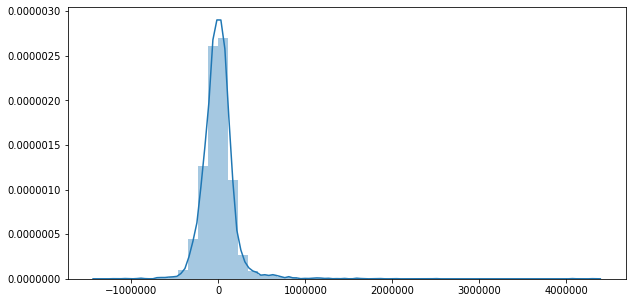

In [30]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [71]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 124516.17
Mean Squared Error:39763621927.16
Root Mean Squared Error:199408.18
Variance score is: 0.69


In [20]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

540296.5735055795

In [35]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.70
Test Score 0.69


# Method2: Keras Regression

In [38]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [48]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 0s 2ms/step - loss: 431846817792.0000 - val_loss: 416707117056.0000
Epoch 2/400
114/114 [==============================] - 0s 2ms/step - loss: 430849458176.0000 - val_loss: 412913303552.0000
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 412928802816.0000 - val_loss: 370145460224.0000
Epoch 4/400
114/114 [==============================] - 0s 2ms/step - loss: 319094489088.0000 - val_loss: 221985538048.0000
Epoch 5/400
114/114 [==============================] - 0s 2ms/step - loss: 151335354368.0000 - val_loss: 90897498112.0000
Epoch 6/400
114/114 [==============================] - 0s 1ms/step - loss: 79043969024.0000 - val_loss: 70402908160.0000
Epoch 7/400
114/114 [==============================] - 0s 1ms/step - loss: 66964807680.0000 - val_loss: 63517659136.0000
Epoch 8/400
114/114 [==============================] - 0s 2ms/step - loss: 61296820224.0000 - val_loss: 58992787456.0000
Epoch 9/400
114/114 [==

114/114 [==============================] - 0s 2ms/step - loss: 30778957824.0000 - val_loss: 30762110976.0000
Epoch 69/400
114/114 [==============================] - 0s 2ms/step - loss: 30711296000.0000 - val_loss: 30776889344.0000
Epoch 70/400
114/114 [==============================] - 0s 2ms/step - loss: 30707701760.0000 - val_loss: 30649219072.0000
Epoch 71/400
114/114 [==============================] - 0s 2ms/step - loss: 30629373952.0000 - val_loss: 30634784768.0000
Epoch 72/400
114/114 [==============================] - 0s 1ms/step - loss: 30566643712.0000 - val_loss: 30518294528.0000
Epoch 73/400
114/114 [==============================] - 0s 2ms/step - loss: 30549276672.0000 - val_loss: 30499051520.0000
Epoch 74/400
114/114 [==============================] - 0s 2ms/step - loss: 30470137856.0000 - val_loss: 30398783488.0000
Epoch 75/400
114/114 [==============================] - 0s 1ms/step - loss: 30414315520.0000 - val_loss: 30542989312.0000
Epoch 76/400
114/114 [===============

Epoch 135/400
114/114 [==============================] - 0s 2ms/step - loss: 28448884736.0000 - val_loss: 28424751104.0000
Epoch 136/400
114/114 [==============================] - 0s 2ms/step - loss: 28448253952.0000 - val_loss: 28481972224.0000
Epoch 137/400
114/114 [==============================] - 0s 2ms/step - loss: 28404092928.0000 - val_loss: 28374874112.0000
Epoch 138/400
114/114 [==============================] - 0s 2ms/step - loss: 28361666560.0000 - val_loss: 28353099776.0000
Epoch 139/400
114/114 [==============================] - 0s 2ms/step - loss: 28341989376.0000 - val_loss: 28300013568.0000
Epoch 140/400
114/114 [==============================] - 0s 2ms/step - loss: 28274028544.0000 - val_loss: 28281712640.0000
Epoch 141/400
114/114 [==============================] - 0s 1ms/step - loss: 28261306368.0000 - val_loss: 28425381888.0000
Epoch 142/400
114/114 [==============================] - 0s 1ms/step - loss: 28275476480.0000 - val_loss: 28233797632.0000
Epoch 143/400
11

114/114 [==============================] - 0s 2ms/step - loss: 26983925760.0000 - val_loss: 26923823104.0000
Epoch 202/400
114/114 [==============================] - 0s 2ms/step - loss: 26927214592.0000 - val_loss: 26954809344.0000
Epoch 203/400
114/114 [==============================] - 0s 2ms/step - loss: 26885666816.0000 - val_loss: 26881773568.0000
Epoch 204/400
114/114 [==============================] - 0s 2ms/step - loss: 26890108928.0000 - val_loss: 26908710912.0000
Epoch 205/400
114/114 [==============================] - 0s 2ms/step - loss: 26855077888.0000 - val_loss: 26861570048.0000
Epoch 206/400
114/114 [==============================] - 0s 2ms/step - loss: 26859268096.0000 - val_loss: 26845407232.0000
Epoch 207/400
114/114 [==============================] - 0s 2ms/step - loss: 26862024704.0000 - val_loss: 26852661248.0000
Epoch 208/400
114/114 [==============================] - 0s 2ms/step - loss: 26795900928.0000 - val_loss: 26831376384.0000
Epoch 209/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 25695528960.0000 - val_loss: 25947287552.0000
Epoch 268/400
114/114 [==============================] - 0s 2ms/step - loss: 25690988544.0000 - val_loss: 25970337792.0000
Epoch 269/400
114/114 [==============================] - 0s 2ms/step - loss: 25686947840.0000 - val_loss: 25958864896.0000
Epoch 270/400
114/114 [==============================] - 0s 2ms/step - loss: 25665097728.0000 - val_loss: 25956780032.0000
Epoch 271/400
114/114 [==============================] - 0s 2ms/step - loss: 25682690048.0000 - val_loss: 25916592128.0000
Epoch 272/400
114/114 [==============================] - 0s 1ms/step - loss: 25658212352.0000 - val_loss: 25868318720.0000
Epoch 273/400
114/114 [==============================] - 0s 2ms/step - loss: 25636632576.0000 - val_loss: 25877624832.0000
Epoch 274/400
114/114 [==============================] - 0s 1ms/step - loss: 25645297664.0000 - val_loss: 25947410432.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 24899155968.0000 - val_loss: 25543426048.0000
Epoch 334/400
114/114 [==============================] - 0s 2ms/step - loss: 24928391168.0000 - val_loss: 25339869184.0000
Epoch 335/400
114/114 [==============================] - 0s 1ms/step - loss: 25020213248.0000 - val_loss: 25360822272.0000
Epoch 336/400
114/114 [==============================] - 0s 2ms/step - loss: 24931977216.0000 - val_loss: 25301069824.0000
Epoch 337/400
114/114 [==============================] - 0s 3ms/step - loss: 24943118336.0000 - val_loss: 25351034880.0000
Epoch 338/400
114/114 [==============================] - 0s 2ms/step - loss: 24873246720.0000 - val_loss: 25471995904.0000
Epoch 339/400
114/114 [==============================] - 0s 1ms/step - loss: 24845746176.0000 - val_loss: 25309898752.0000
Epoch 340/400
114/114 [==============================] - 0s 1ms/step - loss: 24864661504.0000 - val_loss: 25446977536.0000
Epoch 341/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 24361777152.0000 - val_loss: 24998526976.0000
Epoch 400/400
114/114 [==============================] - 0s 2ms/step - loss: 24309962752.0000 - val_loss: 24912136192.0000


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  418       
_________________________________________________________________
dense_1 (Dense)              multiple                  380       
_________________________________________________________________
dense_2 (Dense)              multiple                  380       
_________________________________________________________________
dense_3 (Dense)              multiple                  380       
_________________________________________________________________
dense_4 (Dense)              multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


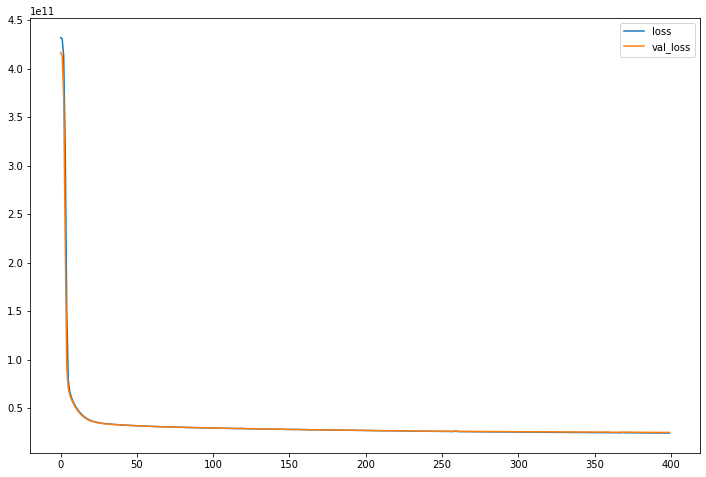

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


# Evaluation on Test Data

In [53]:
y_pred = model.predict(X_test)

In [54]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 96667.89
Mean Squared Error: 24912134897.75
Root Mean Squared Error: 157835.78
Variance score is: 0.81


In [55]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

540296.5735055795

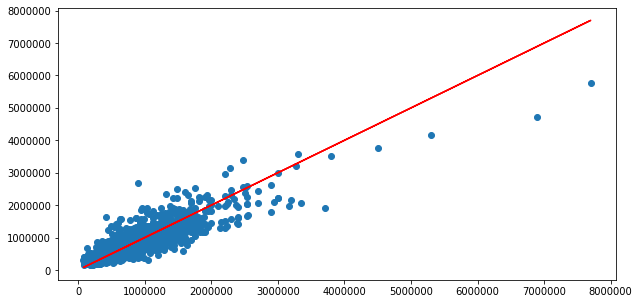

In [59]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

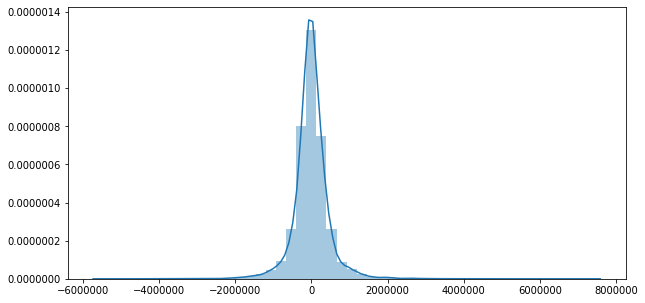

In [66]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Hoe we can use the model!

In [76]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = Data.drop('price',axis = 1).iloc[0]

In [82]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,19))

In [83]:
# apply model on those featurs
model.predict(single_house)

array([[274631.34]], dtype=float32)

In [86]:
# compare the prediction with real price for the first column
Data['price'][0]

221900.0

# Multiple Linear Regression vs Keras Regression

In [98]:

print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 96667.89
Mean Squared Error(MSE): 24912134897.75
Root Mean Squared Error(RMSE): 157835.78
Variance score: 80.84

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 124516.17
Mean Squared Error(MSE):39763621927.16
Root Mean Squared Error(RMSE):199408.18
Variance score: 69.42
